In [27]:
import numpy as np
import matplotlib 
import matplotlib as mpl
from astropy import *
from astropy.table import Table


%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(10.0,10.0)    #(6.0,4.0)
matplotlib.rcParams['font.size']=16              #10 
matplotlib.rcParams['savefig.dpi']= 200             #72 
colours = mpl.rcParams['axes.color_cycle'] 


Populating the interactive namespace from numpy and matplotlib


/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
M = 1.17
P = 628.
year = 365.25
aearth = 1.
rsun = 6.957e8
au = 149597870700 # m

print rsun/au

0.00465046726096


In [3]:
const = aearth**3 / year**2

In [4]:
a = (P**2 * const)**(1/3.)
print a

1.43520171971


In [75]:
R = M**0.8
print R

1.13383194656


In [76]:
def L(M):
    logl = 4.328*np.log(M) -0.002
    return np.exp(logl)
    
print L(M)

1.96897327138


In [77]:
def teffpred(L,R):
    return 5777.*(L/R**2.)**0.25

print teffpred(L(M),R)

6426.69926906


In [78]:
def teq(Teff,Rstar,axis,f,A):
    '''Teff is star, R is stellar radius, a is semimajor axis, A is Bond albedo, f is the 
    geometric factor of reradiation'''
    
    return Teff*np.sqrt(Rstar*rsun/2./(axis*au))*(f*(1.-A))**0.25

In [79]:
tstar = teffpred(L(M),R)

In [70]:
tplan = teq(tstar,R,a,2.0,0.5)
print tplan

275.447698188


In [71]:
L(M)/(a**2)

0.95590322869547595

In [72]:
R

1.133831946557216

In [92]:
## earth

Tearth = teq(5777,1.,1.,2.0,0.29)
print Tearth

304.093930109


In [86]:
tvenus = teq(5770,1.,0.72,1.0,0.6)
print tvenus

260.770140262


In [14]:
mas2rad = 1000*3600*180./np.pi

In [15]:
## today

giant_teff = 3934.

distance = 19.34 # pc
angular = 20.58e-3
print angular

linear = angular*distance*(au)/rsun



0.02058


In [16]:
tgiant = teq(giant_teff,linear,a,2.0,0.5)

In [17]:
tgiant

1464.9196508550642

## Now let's use MCMC to get uncertainties on these. We have uncertainties in mass and everthing else is derived from scaling relations.

In [18]:
nmass = 10000
masses = 1.17 + np.random.randn(nmass)*0.05

In [21]:
ells = L(masses)
arrs = masses**0.8

teffs = teffpred(ells,arrs)

In [ ]:
const = aearth**3 / year**2

In [43]:
axes = (P**2 * const*masses)**(1/3.)

In [93]:
teqs = teq(teffs,arrs,axes,2.,0.29)


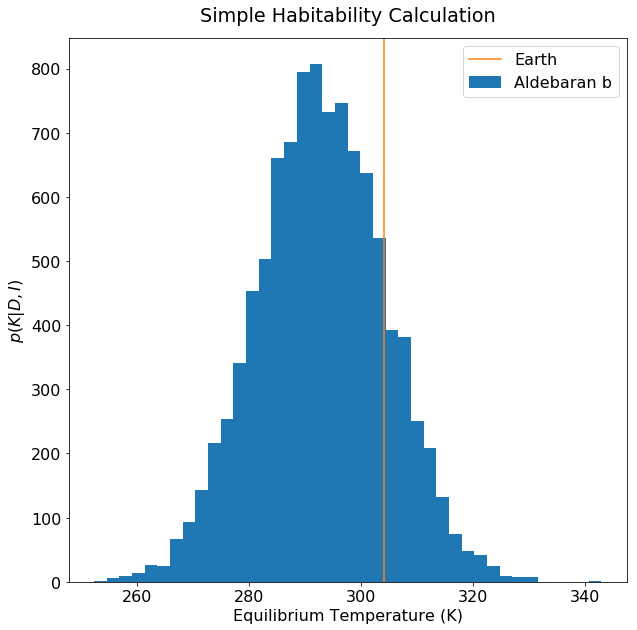

In [94]:
h = plt.hist(teqs,bins=40,label="Aldebaran b")
plt.axvline(Tearth,color=colours[1],label="Earth")
plt.xlabel("Equilibrium Temperature (K)")
plt.ylabel(r"$p(K|D,I)$")
plt.legend()
plt.title('Simple Habitability Calculation',y=1.02)
plt.savefig('aldebaran_b_habitability.png')

In [104]:
print np.mean(teqs), np.std(teqs)

292.975985497 11.4113850822


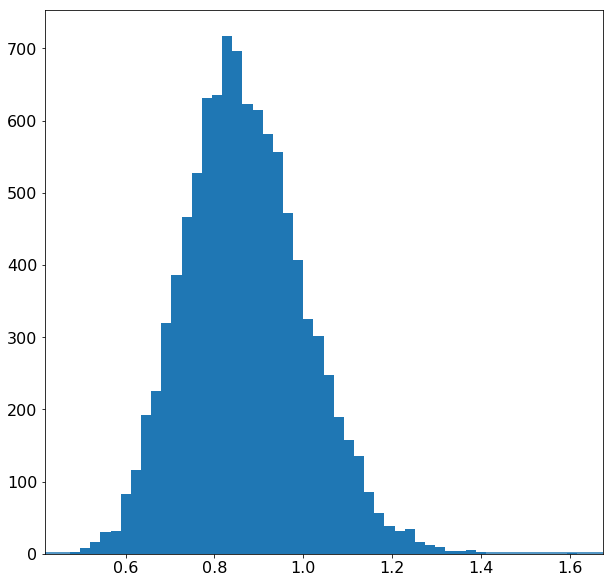

In [99]:
h = plt.hist(ells/axes**2.,bins=50)
plt.axvline(1.0)

In [107]:
print np.mean(ells/(axes**2.)), np.std(ells/(axes**2.))

0.869431139808 0.13527380381


In [108]:
print np.mean(ells), np.std(ells)

1.99719764525 0.367559403971


In [109]:
print np.mean(axes), np.std(axes)

1.51215442691 0.0214728413543
